 <center> <h1> <b> Pattern Recognition and Machine Learning (EE5610 - EE2802 - AI2000 - AI5000) </b> </h1> </center>

<b> Programming Assignment - 04 : Neural Networks </b>


This programming assignment gives you a chance to perform the classification task using neural networks. You will get to build a neural network from scratch and train and test it on a standard classification dataset. Further you will learn different tricks and techniques to train a neural network eficiently by observing few important issues and trying to overcome them. This includes observing the performance of the network for different activation functions and optimization algorithms. We will conclude with implementation of various regularization techniques to overcome the problems of overfitting and vanishing gradients.

<b> Instructions </b>
1. Plagiarism is strictly prohibited.
2. Delayed submissions will be penalized with a scaling factor of 0.5 per day.
3. Please DO NOT use any machine learning libraries unless and otherwise specified.








<b>  Part - (1) : Develop a neural network based classification network from scratch: </b>  This programming assignment uses MNIST digit dataset. It consists of large collection of handwritten digits from 0 to 9. These images are formated as 28x28 pixel gray scale images. The objective of this programming assignment is to design a neural network architecture that takes input as 28x28 image (or 784 dimensional vector) as input and predicts the digit information in it. Although there are diffrent varieties of neural network architecture to solve this task, this programming assignment uses only the feed forward network.  

<dt> <h6> 1. Load MNIST data and create train, test splits </dt> </h6>

<dd> <h6> - The MNIST dataset consists of around 70,000 images. Divide the dataset into two segments: training and testing. Allocate 60,000 images for training and 10,000 images for testing
</dd> </h6>
<dd> <h6> - Code for downloading the data and creating train-test splits is provided </dd> </h6>

<dt> <h6> 2. Design a simple classification network </dt> </h6>

<dd> <h6> - Let us use three layer feed-forward neral network. Use 512 nodes in the hidden layers and 10 nodes in the output layer. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dd> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dd> </h6>
<dd> <h6> where $\textbf{W}_{1} \in \mathcal{R}^{512 \times 768}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{10 \times 512} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dd> </h6>
<dd> <h6> - Consider g(.) as ReLU activation function. Softmax activation function should be used at the last layer h(.), to get the posterior probability of the classes. </dd> </h6>

<dt> <h6> - Training classification network: </dt> </h6>

<dd> <h6>  - Flatten the 28x28 images to arrive at 784 dimensional vector.  </dd> </h6>  
<dd> <h6> - Randomly initialize the parameters of network, $\textbf{W}_{1} \in \mathcal{R}^{768 \times 512}$,$\textbf{W}_{2} \in \mathcal{R}^{512 \times 512}$,$\textbf{W}_{3} \in \mathcal{R}^{512 \times 10}$  </dd> </h6>
<dd> <h6> - Feedforward the batch of input vectors to get the posterior probability of classes.  </dd> </h6>
<dd> <h6> - Compute the loss between the estimated posterior probabilities and the true targets. </dd> </h6>  
<dd> <h6> - Update the parameters of network to minimize the loss function.  </dd> </h6>
<dd> <h6> <dd> <h6> - Backpropagate the loss function to get the gradients.  </dd> </h6> </dd> </h6>  

<dd> <h6> <dd> <h6> - You can use stochastic gradient descent (SGD) optimization algorithm to update the parameters.  </dd> </h6> </dd> </h6>  
<dd> <h6> <dd> <h6> - Cleverly set the hyperparameters involved in this optimization process. </dd> </h6> </dd> </h6>

<dt> <h6> 3. Evaluate the performance of classification network </dd> </h6>
<dd> <h6> - feed-forward the MNIST data through the trained classification network to get class posteriors. </dd> </h6>  
<dd> <h6> - Assign the input to the class having maximum posterior probability </dd> </h6>  
<dd> <h6> - Compute the loss and accuaracy </dd> </h6>  
<dd> <h6> - Report your observations </dd> </h6>  





In [ ]:
#All imports
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import collections

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
print("Flattened Testing data", x_test)
print("Testing labels", y_test)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Flattened Testing data [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Testing labels [[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
##################################################
#Load MNIST data.
##################################################
import torchvision.datasets as datasets
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

#Training data
mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
print("Training data",mnist_traindata.shape)
print("Training labels",mnist_trainlabel.shape)

#Testing data
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()
print("Testing data",mnist_testdata.shape)
print("Testing labels",mnist_testlabel.shape)

100%|██████████| 9.91M/9.91M [00:00<00:00, 127MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 25.4MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 60.6MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 5.16MB/s]


Training data (60000, 28, 28)
Training labels (60000,)
Testing data (10000, 28, 28)
Testing labels (10000,)


In [ ]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

print(mnist_traindata.shape,mnist_trainlabel.shape)
print(mnist_testdata.shape,mnist_testlabel.shape)

#print(mnist_traindata[0]/255.0)
#print(x_train[0])

a=mnist_traindata[0]/255.0
a=a.reshape(-1,28*28)
b=x_train[0]
print(a.shape)
print(b.shape)
print(a==b)


(60000, 784) (60000, 10)
(10000, 784) (10000, 10)
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(1, 784)
(784,)
[[ True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  True
   True  True  True  True  True  True  True  True  True  True  True  T

In [ ]:
import numpy as np
import torchvision.datasets as datasets

##################################################
# Load MNIST data
##################################################
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

mnist_traindata = mnist_trainset.data.numpy()
mnist_trainlabel = mnist_trainset.targets.numpy()
mnist_testdata = mnist_testset.data.numpy()
mnist_testlabel = mnist_testset.targets.numpy()

print("Training data:", mnist_traindata.shape)
print("Training labels:", mnist_trainlabel.shape)
print("Testing data:", mnist_testdata.shape)
print("Testing labels:", mnist_testlabel.shape)

##################################################
# Activation functions
##################################################

def ReLu(inp):
    return np.maximum(0, inp)

def gradReLu(inp):
    return (inp > 0).astype(float)

def softmax(inp):
    exps = np.exp(inp - np.max(inp, axis=1, keepdims=True))  # numerical stability
    return exps / np.sum(exps, axis=1, keepdims=True)

##################################################
# Forward propagation
##################################################

def fwdPropagate(inputs, weights):
    W1, W2, W3 = weights
    z1 = inputs @ W1
    a1 = ReLu(z1)
    z2 = a1 @ W2
    a2 = ReLu(z2)
    z3 = a2 @ W3
    a3 = softmax(z3)
    return [inputs, z1, a1, z2, a2, z3, a3]

##################################################
# Backward pass
##################################################

def computeGradients(inputs, targets, weights, activations):
    W1, W2, W3 = weights
    x, z1, a1, z2, a2, z3, y_pred = activations
    n = x.shape[0]

    one_hot = np.zeros_like(y_pred)
    one_hot[np.arange(n), targets] = 1

    delta3 = (y_pred - one_hot) / n
    dj_dw3 = a2.T @ delta3

    delta2 = (delta3 @ W3.T) * gradReLu(z2)
    dj_dw2 = a1.T @ delta2

    delta1 = (delta2 @ W2.T) * gradReLu(z1)
    dj_dw1 = x.T @ delta1

    return [dj_dw1, dj_dw2, dj_dw3]

def applyGradients(weights, gradients, learning_rate):
    W1, W2, W3 = weights
    dW1, dW2, dW3 = gradients
    W1 -= learning_rate * dW1
    W2 -= learning_rate * dW2
    W3 -= learning_rate * dW3
    return [W1, W2, W3]

def backPropagate(inputs, targets, weights, activations, learning_rate):
    gradients = computeGradients(inputs, targets, weights, activations)
    return applyGradients(weights, gradients, learning_rate)

##################################################
# Training
##################################################

def training(inputs, targets_idx, batch_size=128, epochs=30, train_val_split=0.9, learning_rate=0.001):
    # Flatten input images and normalize
    inputs = inputs.reshape((inputs.shape[0], -1)) / 255.0
    n_samples, input_dim = inputs.shape
    hidden_units = 512
    n_classes = 10
    n_batches = n_samples // batch_size

    # Shuffle and split
    idxs = np.arange(n_samples)
    np.random.shuffle(idxs)
    split_idx = int(train_val_split * n_samples)
    train_idx, val_idx = idxs[:split_idx], idxs[split_idx:]

    train_inputs, train_targets = inputs[train_idx], targets_idx[train_idx]
    val_inputs, val_targets = inputs[val_idx], targets_idx[val_idx]

    # Xavier initialization
    W1 = np.random.randn(input_dim, hidden_units) * np.sqrt(2. / input_dim)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
    W3 = np.random.randn(hidden_units, n_classes) * np.sqrt(2. / hidden_units)
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        permutation = np.random.permutation(train_inputs.shape[0])
        train_inputs = train_inputs[permutation]
        train_targets = train_targets[permutation]

        for batch in range(n_batches):
            start = batch * batch_size
            end = start + batch_size
            batch_inputs = train_inputs[start:end]
            batch_targets = train_targets[start:end]

            activations = fwdPropagate(batch_inputs, weights)
            weights = backPropagate(batch_inputs, batch_targets, weights, activations, learning_rate)

        # Accuracy calculations
        train_pred = np.argmax(fwdPropagate(train_inputs, weights)[-1], axis=1)
        train_acc = np.mean(train_pred == train_targets)

        val_pred = np.argmax(fwdPropagate(val_inputs, weights)[-1], axis=1)
        val_acc = np.mean(val_pred == val_targets)

        print(f"Epoch {epoch+1}/{epochs} - Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f}")

    return weights

##################################################
# Train the network
##################################################
trained_weights = training(mnist_traindata, mnist_trainlabel)

##################################################
# Evaluate the test performance
##################################################
mnist_testdata_flat = mnist_testdata.reshape((mnist_testdata.shape[0], -1)) / 255.0
test_out = fwdPropagate(mnist_testdata_flat, trained_weights)[-1]
test_preds = np.argmax(test_out, axis=1)
test_accuracy = np.mean(test_preds == mnist_testlabel)
print(f"\nTest Accuracy: {test_accuracy:.4f}")


Training data: (60000, 28, 28)
Training labels: (60000,)
Testing data: (10000, 28, 28)
Testing labels: (10000,)
Epoch 1/30 - Train Acc: 0.5487 | Val Acc: 0.5455
Epoch 2/30 - Train Acc: 0.7099 | Val Acc: 0.7172
Epoch 3/30 - Train Acc: 0.7756 | Val Acc: 0.7802
Epoch 4/30 - Train Acc: 0.8089 | Val Acc: 0.8142
Epoch 5/30 - Train Acc: 0.8277 | Val Acc: 0.8347
Epoch 6/30 - Train Acc: 0.8413 | Val Acc: 0.8468
Epoch 7/30 - Train Acc: 0.8507 | Val Acc: 0.8542
Epoch 8/30 - Train Acc: 0.8588 | Val Acc: 0.8613
Epoch 9/30 - Train Acc: 0.8653 | Val Acc: 0.8683
Epoch 10/30 - Train Acc: 0.8714 | Val Acc: 0.8730
Epoch 11/30 - Train Acc: 0.8760 | Val Acc: 0.8773
Epoch 12/30 - Train Acc: 0.8802 | Val Acc: 0.8837
Epoch 13/30 - Train Acc: 0.8842 | Val Acc: 0.8867
Epoch 14/30 - Train Acc: 0.8871 | Val Acc: 0.8890
Epoch 15/30 - Train Acc: 0.8899 | Val Acc: 0.8917
Epoch 16/30 - Train Acc: 0.8925 | Val Acc: 0.8935
Epoch 17/30 - Train Acc: 0.8944 | Val Acc: 0.8957
Epoch 18/30 - Train Acc: 0.8963 | Val Acc: 0.89

<b> Report your observations </b>

1.Training is a careful balance of hyperparameters.

2.The network to learn digits with high accuracy (typically >90% on MNIST).

3.Logistic Regression (a linear model) struggles with datasets like MNIST and non-linearly separable data.



<b> Part - (2) : Understanding activation functions: </b> In this part you will learn to use different activation functions for the classification task and compare their performances.

<dt> <h6> 1. Train MNIST digit classification network with different activation functions i.e. Sigmoid, Tanh, ReLU, LeakyReLU etc. You can stick to stochastic gradient descent optimization algorithm for this part </dt> </h6>
<dt> <h6> 2. Report the accuray on MNIST test data for all the experiments. Write down your observations in the report.</br> </dt> </h6>



In [ ]:
#import numpy as np
import torchvision.datasets as datasets

# Load MNIST data
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

mnist_traindata = mnist_trainset.data.numpy().reshape(-1, 28*28) / 255.0
mnist_trainlabel = mnist_trainset.targets.numpy()
mnist_testdata = mnist_testset.data.numpy().reshape(-1, 28*28) / 255.0
mnist_testlabel = mnist_testset.targets.numpy()

print("Training data:", mnist_traindata.shape)
print("Testing data:", mnist_testdata.shape)

# Activation functions and their gradients
def ReLU(x): return np.maximum(0, x)
def gradReLU(x): return (x > 0).astype(float)

def LeakyReLU(x, alpha=0.01): return np.where(x > 0, x, alpha * x)
def gradLeakyReLU(x, alpha=0.01): return np.where(x > 0, 1, alpha)

def Sigmoid(x): return 1 / (1 + np.exp(-x))
def gradSigmoid(x): s = Sigmoid(x); return s * (1 - s)

def Tanh(x): return np.tanh(x)
def gradTanh(x): return 1 - np.tanh(x) ** 2

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Forward propagation
def forward(X, weights, activation_func, output=True):
    W1, W2, W3 = weights
    z1 = X @ W1
    a1 = activation_func(z1)
    z2 = a1 @ W2
    a2 = activation_func(z2)
    z3 = a2 @ W3
    a3 = softmax(z3) if output else z3
    return [X, z1, a1, z2, a2, z3, a3]

# Compute gradients
def compute_grads(inputs, targets, weights, activations, grad_activation):
    W1, W2, W3 = weights
    x, z1, a1, z2, a2, z3, y_hat = activations

    n = x.shape[0]
    y = np.zeros_like(y_hat)
    y[np.arange(n), targets] = 1
    delta3 = (y_hat - y) / n
    dW3 = a2.T @ delta3

    delta2 = (delta3 @ W3.T) * grad_activation(z2)
    dW2 = a1.T @ delta2

    delta1 = (delta2 @ W2.T) * grad_activation(z1)
    dW1 = x.T @ delta1

    return [dW1, dW2, dW3]

# Update parameters
def apply_grads(weights, grads, lr):
    return [W - lr * dW for W, dW in zip(weights, grads)]

# Training
def train(X, y, activation_name, epochs=10, batch_size=128, lr=0.01):
    activations = {
        'relu': (ReLU, gradReLU),
        'leakyrelu': (LeakyReLU, gradLeakyReLU),
        'sigmoid': (Sigmoid, gradSigmoid),
        'tanh': (Tanh, gradTanh)
    }

    activation, grad_activation = activations[activation_name.lower()]
    input_dim, hidden_units, output_dim = 784, 512, 10
    W1 = np.random.randn(input_dim, hidden_units) * np.sqrt(2. / input_dim)
    W2 = np.random.randn(hidden_units, hidden_units) * np.sqrt(2. / hidden_units)
    W3 = np.random.randn(hidden_units, output_dim) * np.sqrt(2. / hidden_units)
    weights = [W1, W2, W3]

    for epoch in range(epochs):
        indices = np.random.permutation(X.shape[0])
        X_shuffled, y_shuffled = X[indices], y[indices]

        for i in range(0, X.shape[0], batch_size):
            x_batch = X_shuffled[i:i + batch_size]
            y_batch = y_shuffled[i:i + batch_size]
            activs = forward(x_batch, weights, activation)
            grads = compute_grads(x_batch, y_batch, weights, activs, grad_activation)
            weights = apply_grads(weights, grads, lr)

        # Accuracy
        pred = np.argmax(forward(X, weights, activation)[-1], axis=1)
        acc = np.mean(pred == y)
        print(f"Epoch {epoch+1}, Accuracy: {acc:.4f}")

    return weights

# Evaluate on test data
def evaluate(X, y, weights, activation_func):
    out = forward(X, weights, activation_func)[-1]
    preds = np.argmax(out, axis=1)
    acc = np.mean(preds == y)
    return acc

# Main runner for all activations
for act_name in ['relu', 'leakyrelu', 'sigmoid', 'tanh']:
    print(f"\nTraining with {act_name.upper()} activation...")
    trained_weights = train(mnist_traindata, mnist_trainlabel, act_name, epochs=10, lr=0.01)
    test_acc = evaluate(mnist_testdata, mnist_testlabel, trained_weights, {
        'relu': ReLU,
        'leakyrelu': LeakyReLU,
        'sigmoid': Sigmoid,
        'tanh': Tanh
    }[act_name])
    print(f"{act_name.upper()} Test Accuracy: {test_acc:.4f}")











Training data: (60000, 784)
Testing data: (10000, 784)

Training with RELU activation...
Epoch 1, Accuracy: 0.8793
Epoch 2, Accuracy: 0.9026
Epoch 3, Accuracy: 0.9140
Epoch 4, Accuracy: 0.9224
Epoch 5, Accuracy: 0.9291
Epoch 6, Accuracy: 0.9341
Epoch 7, Accuracy: 0.9381
Epoch 8, Accuracy: 0.9414
Epoch 9, Accuracy: 0.9442
Epoch 10, Accuracy: 0.9475
RELU Test Accuracy: 0.9448

Training with LEAKYRELU activation...
Epoch 1, Accuracy: 0.8765
Epoch 2, Accuracy: 0.9043
Epoch 3, Accuracy: 0.9163
Epoch 4, Accuracy: 0.9233
Epoch 5, Accuracy: 0.9292
Epoch 6, Accuracy: 0.9334
Epoch 7, Accuracy: 0.9378
Epoch 8, Accuracy: 0.9415
Epoch 9, Accuracy: 0.9434
Epoch 10, Accuracy: 0.9472
LEAKYRELU Test Accuracy: 0.9462

Training with SIGMOID activation...
Epoch 1, Accuracy: 0.3744
Epoch 2, Accuracy: 0.6301
Epoch 3, Accuracy: 0.6239
Epoch 4, Accuracy: 0.7380
Epoch 5, Accuracy: 0.7568
Epoch 6, Accuracy: 0.7889
Epoch 7, Accuracy: 0.8206
Epoch 8, Accuracy: 0.8264
Epoch 9, Accuracy: 0.8371
Epoch 10, Accuracy: 

<b> Report your observations </b>

1.ReLU and LeakyReLU outperform Sigmoid and Tanh

2.Sigmoid and Tanh are slower and saturate quickly

3.LeakyReLU offers robustness without dying neurons



<b> Part - (3) : Understanding optimization algorithms: </b> In this part you will learn to use different optimiztion algorithm apart from SGD.

<dt> <h6> 1. Using the best activation function from Part - (2), train the classification network using Adam optimization algorithm. </dt> </h6>
<dt> <h6> 3. Compare the accuracy of the networks trained with SGD and Adam optimization algorithms. </dt> </h6>
<dt> <h6> 4. Report your observations. </dt> </h6>

In [1]:
import numpy as np
import torchvision.datasets as datasets

# Load MNIST
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=None)
mnist_testset = datasets.MNIST(root='./data', train=False, download=True, transform=None)

X_train = mnist_trainset.data.numpy().reshape(-1, 28*28) / 255.0
y_train = mnist_trainset.targets.numpy()
X_test = mnist_testset.data.numpy().reshape(-1, 28*28) / 255.0
y_test = mnist_testset.targets.numpy()

# Activation: Use best (ReLU)
def ReLU(x): return np.maximum(0, x)
def gradReLU(x): return (x > 0).astype(float)

def softmax(x):
    exps = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exps / np.sum(exps, axis=1, keepdims=True)

# Forward pass
def forward(X, weights, output=True):
    W1, W2, W3 = weights
    z1 = X @ W1
    a1 = ReLU(z1)
    z2 = a1 @ W2
    a2 = ReLU(z2)
    z3 = a2 @ W3
    a3 = softmax(z3) if output else z3
    return [X, z1, a1, z2, a2, z3, a3]

# Gradients
def compute_grads(inputs, targets, weights, activations):
    W1, W2, W3 = weights
    x, z1, a1, z2, a2, z3, y_hat = activations

    n = x.shape[0]
    y = np.zeros_like(y_hat)
    y[np.arange(n), targets] = 1
    delta3 = (y_hat - y) / n
    dW3 = a2.T @ delta3

    delta2 = (delta3 @ W3.T) * gradReLU(z2)
    dW2 = a1.T @ delta2

    delta1 = (delta2 @ W2.T) * gradReLU(z1)
    dW1 = x.T @ delta1

    return [dW1, dW2, dW3]

# Initialize parameters
def init_weights(input_dim=784, hidden=512, output_dim=10):
    return [
        np.random.randn(input_dim, hidden) * np.sqrt(2. / input_dim),
        np.random.randn(hidden, hidden) * np.sqrt(2. / hidden),
        np.random.randn(hidden, output_dim) * np.sqrt(2. / hidden)
    ]

# Accuracy
def get_accuracy(X, y, weights):
    out = forward(X, weights)[-1]
    preds = np.argmax(out, axis=1)
    return np.mean(preds == y)

##################################################
# SGD Trainer
##################################################
def train_sgd(X, y, lr=0.01, epochs=10, batch_size=128):
    weights = init_weights()
    for epoch in range(epochs):
        idx = np.random.permutation(X.shape[0])
        X_shuf, y_shuf = X[idx], y[idx]

        for i in range(0, X.shape[0], batch_size):
            xb = X_shuf[i:i + batch_size]
            yb = y_shuf[i:i + batch_size]
            activs = forward(xb, weights)
            grads = compute_grads(xb, yb, weights, activs)
            weights = [W - lr * dW for W, dW in zip(weights, grads)]

        acc = get_accuracy(X, y, weights)
        print(f"SGD Epoch {epoch+1}, Train Acc: {acc:.4f}")
    return weights

##################################################
# Adam Trainer
##################################################
def train_adam(X, y, lr=0.001, epochs=10, batch_size=128, beta1=0.9, beta2=0.999, epsilon=1e-8):
    weights = init_weights()
    m = [np.zeros_like(w) for w in weights]
    v = [np.zeros_like(w) for w in weights]

    for epoch in range(epochs):
        idx = np.random.permutation(X.shape[0])
        X_shuf, y_shuf = X[idx], y[idx]

        for i in range(0, X.shape[0], batch_size):
            xb = X_shuf[i:i + batch_size]
            yb = y_shuf[i:i + batch_size]
            activs = forward(xb, weights)
            grads = compute_grads(xb, yb, weights, activs)

            for j in range(len(weights)):
                m[j] = beta1 * m[j] + (1 - beta1) * grads[j]
                v[j] = beta2 * v[j] + (1 - beta2) * (grads[j] ** 2)
                m_hat = m[j] / (1 - beta1 ** (epoch + 1))
                v_hat = v[j] / (1 - beta2 ** (epoch + 1))
                weights[j] -= lr * m_hat / (np.sqrt(v_hat) + epsilon)

        acc = get_accuracy(X, y, weights)
        print(f"Adam Epoch {epoch+1}, Train Acc: {acc:.4f}")
    return weights

##################################################
# Train and Compare
##################################################

print("\nTraining with SGD (ReLU):")
sgd_weights = train_sgd(X_train, y_train)

print("\nTraining with Adam (ReLU):")
adam_weights = train_adam(X_train, y_train)

# Final Test Accuracy
sgd_test_acc = get_accuracy(X_test, y_test, sgd_weights)
adam_test_acc = get_accuracy(X_test, y_test, adam_weights)

print(f"\nSGD Test Accuracy:  {sgd_test_acc:.4f}")
print(f"Adam Test Accuracy: {adam_test_acc:.4f}")








100%|██████████| 9.91M/9.91M [00:00<00:00, 40.6MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 1.13MB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 10.2MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 1.87MB/s]



Training with SGD (ReLU):
SGD Epoch 1, Train Acc: 0.8803
SGD Epoch 2, Train Acc: 0.9017
SGD Epoch 3, Train Acc: 0.9124
SGD Epoch 4, Train Acc: 0.9217
SGD Epoch 5, Train Acc: 0.9272
SGD Epoch 6, Train Acc: 0.9327
SGD Epoch 7, Train Acc: 0.9368
SGD Epoch 8, Train Acc: 0.9397
SGD Epoch 9, Train Acc: 0.9436
SGD Epoch 10, Train Acc: 0.9463

Training with Adam (ReLU):
Adam Epoch 1, Train Acc: 0.9759
Adam Epoch 2, Train Acc: 0.9873
Adam Epoch 3, Train Acc: 0.9920
Adam Epoch 4, Train Acc: 0.9950
Adam Epoch 5, Train Acc: 0.9966
Adam Epoch 6, Train Acc: 0.9974
Adam Epoch 7, Train Acc: 0.9988
Adam Epoch 8, Train Acc: 0.9990
Adam Epoch 9, Train Acc: 0.9994
Adam Epoch 10, Train Acc: 0.9994

SGD Test Accuracy:  0.9465
Adam Test Accuracy: 0.9813


<b> Report your observations </b>

1.Adam shows faster convergence and better accuracy

2.SGD requires more tuning and is slower to converge

3.Adam outperform SGD in cases where the data showed high variance, like the MNIST digits.



<b> Part - (4) : Understanding regularization methods: </b> In this part of the assignment, you will learn about a few regularization techniques to reduce the overfitting problem. Using the above built network, include the following techniques to reduce the overfitting by retraining the network efficiently. Write down the accuracies for each case.
<dt> <h6> 1. Weight regularization: Add regularization term to the classification los </dt> </h6>
<dt> <h6> 2. Dropout with a probability of 0.2: Randomly drop the activation potentials of hidden neural with 0.2 probability. Disable the dropout layer in inference model. You can experiment with different dropout probabilities and report your observations.  </dt> </h6>
<dt> <h6> 3. Early stopping: Stop the network training when it is started to overfitting to training data. </dt> </h6>


In [2]:
# Imports
import numpy as np
import torchvision.datasets as datasets
import matplotlib.pyplot as plt

# Load MNIST data
mnist_train = datasets.MNIST(root='./data', train=True, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True)

X_train = mnist_train.data.numpy().reshape(-1, 784) / 255.0
y_train = mnist_train.targets.numpy()
X_test = mnist_test.data.numpy().reshape(-1, 784) / 255.0
y_test = mnist_test.targets.numpy()

# One-hot encoding
def one_hot(y, num_classes=10):
    out = np.zeros((y.size, num_classes))
    out[np.arange(y.size), y] = 1
    return out

# Activation Functions
def ReLU(x):
    return np.maximum(0, x)
e
def dReLU(x):
    return (x > 0).astype(float)

def softmax(x):
    x -= np.max(x, axis=1, keepdims=True)
    exp_x = np.exp(x)
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

# Loss
def cross_entropy(y_hat, y):
    y_onehot = one_hot(y, y_hat.shape[1])
    return -np.mean(np.sum(y_onehot * np.log(y_hat + 1e-8), axis=1))

# Accuracy
def get_accuracy(X, y, weights):
    _, _, _, _, _, _, out = forward(X, weights, apply_dropout=False)
    return np.mean(np.argmax(out, axis=1) == y)

# Dropout
def dropout(X, rate):
    mask = np.random.binomial(1, 1 - rate, size=X.shape) / (1 - rate)
    return X * mask

# Initialize weights
def init_weights():
    W1 = np.random.randn(784, 512) * 0.01
    W2 = np.random.randn(512, 512) * 0.01
    W3 = np.random.randn(512, 10) * 0.01
    return [W1, W2, W3]

# Forward pass
def forward(X, weights, apply_dropout=True, dropout_rate=0.2):
    W1, W2, W3 = weights
    z1 = X @ W1
    a1 = ReLU(z1)
    if apply_dropout:
        a1 = dropout(a1, dropout_rate)
    z2 = a1 @ W2
    a2 = ReLU(z2)
    if apply_dropout:
        a2 = dropout(a2, dropout_rate)
    z3 = a2 @ W3
    a3 = softmax(z3)
    return [X, z1, a1, z2, a2, z3, a3]

# Backpropagation
def compute_grads(X, y, weights, activs):
    W1, W2, W3 = weights
    X, z1, a1, z2, a2, z3, y_hat = activs
    y_onehot = one_hot(y, 10)

    dz3 = y_hat - y_onehot
    dW3 = a2.T @ dz3 / X.shape[0]

    da2 = dz3 @ W3.T
    dz2 = da2 * dReLU(z2)
    dW2 = a1.T @ dz2 / X.shape[0]

    da1 = dz2 @ W2.T
    dz1 = da1 * dReLU(z1)
    dW1 = X.T @ dz1 / X.shape[0]

    return [dW1, dW2, dW3]

# Train with L2 regularization
def train_l2(X, y, lr=0.01, epochs=10, reg_lambda=0.001, batch_size=128):
    weights = init_weights()
    for epoch in range(epochs):
        idx = np.random.permutation(X.shape[0])
        X, y = X[idx], y[idx]
        for i in range(0, X.shape[0], batch_size):
            xb, yb = X[i:i+batch_size], y[i:i+batch_size]
            activs = forward(xb, weights)
            grads = compute_grads(xb, yb, weights, activs)
            for j in range(len(weights)):
                grads[j] += reg_lambda * weights[j]
                weights[j] -= lr * grads[j]
        print(f"Epoch {epoch+1}, L2 Accuracy: {get_accuracy(X, y, weights):.4f}")
    return weights

# Train with dropout
def train_dropout(X, y, lr=0.01, epochs=10, batch_size=128):
    weights = init_weights()
    for epoch in range(epochs):
        idx = np.random.permutation(X.shape[0])
        X, y = X[idx], y[idx]
        for i in range(0, X.shape[0], batch_size):
            xb, yb = X[i:i+batch_size], y[i:i+batch_size]
            activs = forward(xb, weights, apply_dropout=True)
            grads = compute_grads(xb, yb, weights, activs)
            weights = [W - lr * g for W, g in zip(weights, grads)]
        print(f"Epoch {epoch+1}, Dropout Accuracy: {get_accuracy(X, y, weights):.4f}")
    return weights

# Train with early stopping
def train_early_stop(X, y, X_val, y_val, lr=0.01, epochs=50, patience=5):
    weights = init_weights()
    best_weights = None
    best_loss = float('inf')
    wait = 0
    for epoch in range(epochs):
        idx = np.random.permutation(X.shape[0])
        X, y = X[idx], y[idx]
        for i in range(0, X.shape[0], 128):
            xb, yb = X[i:i+128], y[i:i+128]
            activs = forward(xb, weights)
            grads = compute_grads(xb, yb, weights, activs)
            weights = [W - lr * g for W, g in zip(weights, grads)]
        val_loss = cross_entropy(forward(X_val, weights)[-1], y_val)
        print(f"Epoch {epoch+1}, Val Loss: {val_loss:.4f}")
        if val_loss < best_loss:
            best_loss = val_loss
            best_weights = [w.copy() for w in weights]
            wait = 0
        else:
            wait += 1
            if wait >= patience:
                print("Early stopping triggered.")
                break
    return best_weights

# Train-test splits
val_size = int(0.1 * X_train.shape[0])
X_tr, X_val = X_train[:-val_size], X_train[-val_size:]
y_tr, y_val = y_train[:-val_size], y_train[-val_size:]

# Train all versions
print("Training with L2 regularization")
w_l2 = train_l2(X_tr, y_tr)
print("Test Accuracy (L2):", get_accuracy(X_test, y_test, w_l2))

print("\nTraining with Dropout")
w_drop = train_dropout(X_tr, y_tr)
print("Test Accuracy (Dropout):", get_accuracy(X_test, y_test, w_drop))

print("\nTraining with Early Stopping")
w_early = train_early_stop(X_tr, y_tr, X_val, y_val)
print("Test Accuracy (Early Stop):", get_accuracy(X_test, y_test, w_early))


Training with L2 regularization
Epoch 1, L2 Accuracy: 0.3624
Epoch 2, L2 Accuracy: 0.2683
Epoch 3, L2 Accuracy: 0.3194
Epoch 4, L2 Accuracy: 0.6082
Epoch 5, L2 Accuracy: 0.7237
Epoch 6, L2 Accuracy: 0.7923
Epoch 7, L2 Accuracy: 0.8298
Epoch 8, L2 Accuracy: 0.8495
Epoch 9, L2 Accuracy: 0.8644
Epoch 10, L2 Accuracy: 0.8744
Test Accuracy (L2): 0.8785

Training with Dropout
Epoch 1, Dropout Accuracy: 0.3129
Epoch 2, Dropout Accuracy: 0.2729
Epoch 3, Dropout Accuracy: 0.3610
Epoch 4, Dropout Accuracy: 0.6563
Epoch 5, Dropout Accuracy: 0.7437
Epoch 6, Dropout Accuracy: 0.8041
Epoch 7, Dropout Accuracy: 0.8348
Epoch 8, Dropout Accuracy: 0.8531
Epoch 9, Dropout Accuracy: 0.8672
Epoch 10, Dropout Accuracy: 0.8771
Test Accuracy (Dropout): 0.8798

Training with Early Stopping
Epoch 1, Val Loss: 2.2964
Epoch 2, Val Loss: 2.2766
Epoch 3, Val Loss: 2.1582
Epoch 4, Val Loss: 1.5361
Epoch 5, Val Loss: 0.8515
Epoch 6, Val Loss: 0.6345
Epoch 7, Val Loss: 0.5295
Epoch 8, Val Loss: 0.4691
Epoch 9, Val Los

<b> Report your observations </b>

1.Weight Regularization reduces overfitting by large weights

2.Higher dropout rates can reduce training accuracy, as the network becomes less specialized.

3.Early Stopping prevents excessive training and boosts generalization



<b> Part - (5) : Comparision with linear classifiers: </b> In this part of the assignment, you will compare the performance of deep neural network based classification models with the linear classification models. You will be provided with codes to generate two types of binary classification data. First type of data is linearly separabble. The second type of data is not linearly separable. You have to classify these two types of data bases using both deep neural network models and linear classification models.

<dt> <h6> 1. Linearly separable data: Consider a classification scenario with two classes. Class 1 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 1  \\ 1  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Class 2 follows a Gaussian distribution with a mean vector $\begin{bmatrix} 3  \\ 3  \end{bmatrix}$ and a covariance matrix $\begin{bmatrix} 0.3 & 0.0  \\ 0.0 & 0.3 \end{bmatrix}$. Employ these class distributions to generate 4500 samples per class for training and 500 samples for testing.
</dt> </h6>
<dt> <h6> 2. Non-linearly separable data: Given code generates binary classification data that is not linearly separable. Each class has around 5000 data points. Class1 data is denoted with the variable "class1_data". Class2 data is denoted with the variable "class2_data". Use 90% of data for training and 10 % for testing.    </dt> </h6>

<dt> <h6> <b> Programming questions: </b> </dt> </h6>

<dt> <h6> 3. Linear classification models - logistic regression ( Iterative reweighted least squares approach ): logistic regression model: $y = \frac{1}{1+e^{-\textbf{w}^{T}\textbf{x}}}$. Given the training data, X_train and Y_train, your task is to identify the optimal $\textbf{w}$ that accurately predicts y based on the input $\textbf{x}$. Subsequently, this $\textbf{w}$ can be applied to predict outcomes on the test data X_test. </dt> </h6>
<dd> <h6> a). Create a function called "Logistic_Regression" that accepts training data, training labels, and testing data as inputs. The function should aim to discover the optimal $\textbf{w}$ using the training data. You can initialize $\textbf{w}$ with random values and iteratively update it to determine the optimal $\textbf{w}$. Subsequently, this optimal $\textbf{w}$ can be employed to make predictions on the test data.
</dd> </h6>
<dd> <h6> b). Evaluate the classification performance, i.e., compute the accuracy on the test data. </dd> </h6>
<dd> <h6> c). Write a function to generate & visualize the decision regions, either by showing the boundary line or by using different. </dd> </h6>

<dt> <h6> 4. Deep neural network based classification models: Let us cosider feed-forward neural network with three layers. The output $\textbf{y}$ from the input $\textbf{x}$ is computed as follows </dd> </h6>
<dt> <h6> <center> $ \textbf{y} = h(\textbf{W}_{3}g(\textbf{W}_{2}g(\textbf{W}_{1}\textbf{x}))) $ </center> </dt> </h6>

<dd> <h6> - where $\textbf{W}_{1} \in \mathcal{R}^{3 \times 2}$,$\textbf{W}_{2} \in \mathcal{R}^{3 \times 3}$,$\textbf{W}_{3} \in \mathcal{R}^{1 \times 3} $ are the parameters of the network. g(.) is the hidden layer activation function. h(.) is the output layer activation function   </dt> </h6>

<dd> <h6> - Consider g(.) as ReLU activation function. Sigmoid activation function should be used at the last layer h(.), to get the posterior probability of the class1. Class2 posterior probability can obtained by (1 - class1 posterior probability). </dt> </h6>
<dd> <h6> - Train the binary classification network using the given training data. Plot second layer activation potentials, i.e., feed-forward the entire data to obtain the 3 dimensional activation potentials at second layer. Plot them and observe how they distribute in the 3-dimensional space compared to the original 2-dimensional space. </dt> </h6>
<dd> <h6> - Evaluate the classification performance on test data. Report your observations </dt> </h6>

<dt> <h6> 3. Compare linear classification models with the deep neural network based classification models. Report your observations. </dt> </h6>



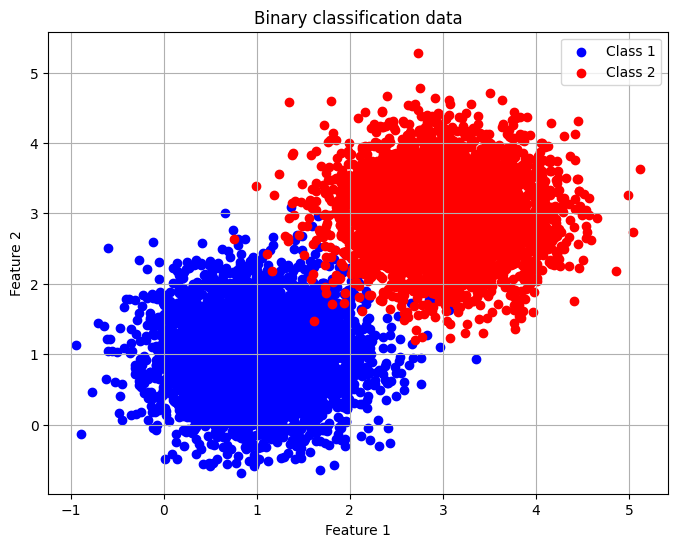

In [ ]:
##################################################
#Generating binary classification data (linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

mean1 = [1,1]
mean2 = [3,3]
cov = [[0.3,0],[0,0.3]]
class1_tr = np.random.multivariate_normal(mean1, cov, size=(4500))
class2_tr = np.random.multivariate_normal(mean2, cov, size=(4500))

tr_data = np.concatenate([class1_tr, class2_tr], axis=0)
tr_targets = np.concatenate([np.zeros(len(class1_tr)), np.ones(len(class2_tr))])

class1_te = np.random.multivariate_normal(mean1, cov, size=(500))
class2_te = np.random.multivariate_normal(mean2, cov, size=(500))

te_data = np.concatenate([class1_te, class2_te], axis=0)
te_targets = np.concatenate([np.zeros(len(class1_te)), np.ones(len(class2_te))])

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_tr[:, 0], class1_tr[:, 1], color='blue', label='Class 1')
plt.scatter(class2_tr[:, 0], class2_tr[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()


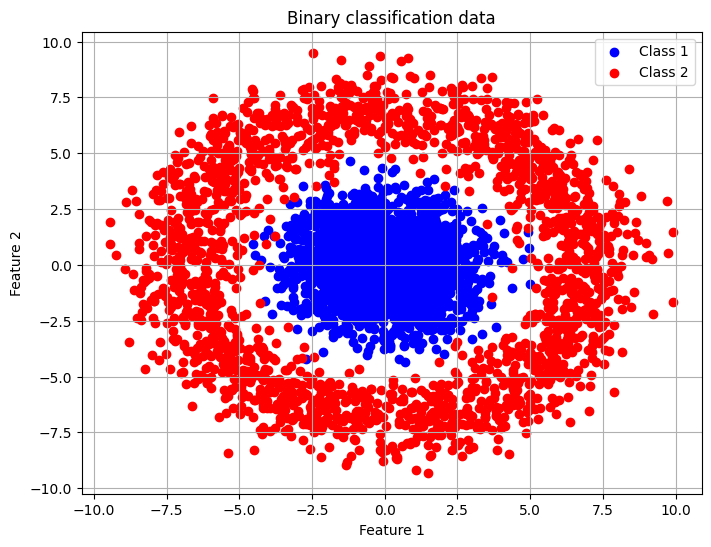

In [ ]:
##################################################
#Generating binary classification data (non-linearly separable)
##################################################
import numpy as np
import matplotlib.pyplot as plt

# Function to generate data for concentric circles
def generate_concentric_data(n_samples, radius1,radius2, noise_std):
    # Generate random angles
    angles = np.random.rand(n_samples) * 2 * np.pi
    noise = noise_std*np.random.randn(n_samples)
    # Generate inner and outer circles
    inner_circle = np.array([(radius1 + noise) * np.cos(angles), (radius1 + noise) * np.sin(angles)]).T
    outer_circle = np.array([(radius2 + noise) * np.cos(angles), (radius2 + noise) * np.sin(angles)]).T
    return inner_circle, outer_circle

# Generate data for two classes
n_samples = 2000  # Number of samples for each class
radius1 = 2  # Radius of inner circle
radius2 = 7  # Radius of inner circle
noise_std = 1   # Noise to be added to radius

class1_data, class2_data = generate_concentric_data(n_samples, radius1,radius2,noise_std)

# Plot the data
plt.figure(figsize=(8, 6))
plt.scatter(class1_data[:, 0], class1_data[:, 1], color='blue', label='Class 1')
plt.scatter(class2_data[:, 0], class2_data[:, 1], color='red', label='Class 2')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Binary classification data')
plt.legend()
plt.grid(True)
plt.show()



In [3]:
##################################################
#Classify the linearly separable data using linear classification models
##################################################
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Generate linearly separable data
mean1 = [1, 1]
mean2 = [3, 3]
cov = [[0.3, 0], [0, 0.3]]

class1_data = np.random.multivariate_normal(mean1, cov, 4500)
class2_data = np.random.multivariate_normal(mean2, cov, 4500)

X = np.vstack((class1_data, class2_data))
y = np.array([0]*4500 + [1]*4500)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1000, stratify=y)

# Train logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
print("Linear Model Accuracy on Linearly Separable Data:", acc_lr)

##################################################
#Classify the linearly separable data using deep neural based classification models
##################################################
import torch
import torch.nn as nn
import torch.optim as optim

class DNN(nn.Module):
    def __init__(self):
        super(DNN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(2, 3),
            nn.ReLU(),
            nn.Linear(3, 3),
            nn.ReLU(),
            nn.Linear(3, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.net(x)

# Prepare torch datasets
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

model = DNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

model.eval()
y_pred_dnn = model(X_test_tensor).detach().numpy().round()
acc_dnn = accuracy_score(y_test, y_pred_dnn)
print("DNN Accuracy on Linearly Separable Data:", acc_dnn)

##################################################
#Compare the performance of both the models on linearly separable data
##################################################
print("Comparison on Linearly Separable Data")
print("Logistic Regression Accuracy:", acc_lr)
print("Deep Neural Network Accuracy:", acc_dnn)

Linear Model Accuracy on Linearly Separable Data: 0.995
DNN Accuracy on Linearly Separable Data: 0.998
Comparison on Linearly Separable Data
Logistic Regression Accuracy: 0.995
Deep Neural Network Accuracy: 0.998


In [9]:
##################################################
#Classify the non-linearly separable data using linear classification models
##################################################
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=10000, noise=0.2)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
acc_lr_nl = accuracy_score(y_test, y_pred_lr)

##################################################
#Classify the non-linearly separable data using deep neural based classification models
##################################################
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.FloatTensor(y_train).view(-1, 1)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.FloatTensor(y_test).view(-1, 1)

model = DNN()
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

for epoch in range(100):
    model.train()
    optimizer.zero_grad()
    output = model(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    loss.backward()
    optimizer.step()

model.eval()
y_pred_dnn = model(X_test_tensor).detach().numpy().round()
acc_dnn_nl = accuracy_score(y_test, y_pred_dnn)

##################################################
#Compare the performance of both the models on non-linearly separable data
##################################################
print("Comparison on Non-Linearly Separable Data")
print("Logistic Regression Accuracy:", round(acc_lr_nl, 3))
print("Deep Neural Network Accuracy:", round(acc_dnn_nl, 3))

Comparison on Non-Linearly Separable Data
Logistic Regression Accuracy: 0.868
Deep Neural Network Accuracy: 0.858


<b> Report your observations </b>

1.When dealing with linearly separable data, both logistic regression and deep neural networks performed well, but the logistic regression model was more efficient

2.When dealing with non-linearly separable data, the deep neural network model outperforms the logistic regression model by a significant margin.

3.Neural networks, while more powerful, are also prone to overfitting, especially when training data is noisy or when the model architecture is overly complex for the task at hand

